# | ------------------------------------------- Major Project ------------------------------------------- |

## Project Domain :- Data Science
### Project Title :- EBAY TECH DEVICES ANALYSIS (Data Mining)

#### Problem Statement :- Use data mining methods to mine EBay tech devices and analyze/visualize the datasets.

#### Description :-
EBay is an American multinational e-commerce corporation that facilitates consumer-to-consumer and business-to-consumer sales through its website.The company manages the eBay website, an online auction and shopping website in which people and businesses buy and sell a wide variety of goods and services worldwide.

###### Skills Involved :- Data Gathering, Data Analysis, Data Visualization, Machine Learning.

In [1]:
"""
For Effective Data Analysis and predictions (Price Predictions in our Case), The most important requirement is Data.
And by Data, We mean Clean Data (With udnerstandable and filtered values). After that saving the Data and finally making
the predictions.

The process can be summed up as:
1) Data Gathering
2) Data Cleaning
3) Data Analysis
4) Data Visualization
5) Making Predictions

The project asks for mining of Tech Devices but since they are enormous in numbers so for the sake of simplicity, 
We will have our focus on Laptops and their features for final price prediction. However, this approach can be extended to 
all the products by specifying appropriate keyword in the URL.
"""

#Importing all the required modules for quick and effective analysis:-

import requests     #The requests module allows you to send HTTP requests using Python. HTTP request returns a Response Object.
from bs4 import BeautifulSoup   #Beautiful Soup is a python package which allows us to pull data out of HTML and XML documents.
import re   #re module is used to work with RegEx for effective string analysis
import pandas as pd   #Pandas is a Python library used for working with data sets.

print("| -------------------------------------------* EBay Price Prediction *------------------------------------------- |")

#The following lists are used to store various types of data during data gathering phase.
item_name = []
prices = []
RAM = []
conditions = []
GPU = []
SSD = []

| -------------------------------------------* EBay Price Prediction *------------------------------------------- |


In [2]:
#Data Gathering and Cleaning...

print("Fetching...")

#Condition Specified whether the product is new or old according to the parameters in website URL
#1000 means NEW and 3000 means Used product, We will iterate through them both.
for condition in [1000,3000]:
    #The following loop iterates through the specified number of pages for the product (Laptops)
    for i in range(1,6):
        ebayUrl = f"https://www.ebay.com/sch/i.html?_from=R40&_nkw=Laptops&_sacat=0&LH_TitleDesc=0&rt=nc&LH_ItemCondition={condition}&_pgn="+str(i)
        r = requests.get(ebayUrl)
        data = r.text
        soup=BeautifulSoup(data)
        listings = soup.find_all('li', attrs={'class': 's-item'})
        #listings hold all the list data of the page consisting of all products displayed.

        for listing in listings:
            #Iterating for each product in the list of products
            prod_price = " "
            title = " "
            #For each product, we will visit the product page through anchor tag and gather other essential Data.
            prod_url = listing.find('a')["href"]
            new_r = requests.get(prod_url)
            new_data = new_r.text
            new_soup = BeautifulSoup(new_data)
            title = new_soup.find("h1", attrs={"id":"itemTitle"})
            #title holds the title of the given product on the product page
            
            #If there's no title on the page, possibly there's no product so skip the whole process and move to next product
            if not title:
                continue    
                
            item_name.append(title.contents[1])
            conditions.append("New" if condition == 1000 else "Used")
            
            #Depending on condition of product, the product Id on page changes, so accomodate that in the code below
            if condition == 1000:
                price = new_soup.find('span', attrs={'id':"prcIsum"})
            else:
                price = new_soup.find('span', attrs ={'id' :"prcIsum_bidPrice"})   
            if not price:
                price = new_soup.find('span', attrs ={'id' :"mm-saleDscPrc"})
            
            #If still price not found, append -1 signifying missing Data, else append.
            if not price:
                prices.append(-1)
            else:
                prod_price = float(re.sub(",","",price.text[4:]))   
                prices.append(prod_price)
                
            #Attribute table holds all the required specs of the product, so get it and then get all the table columns.
            attr_table = new_soup.find("div", attrs = {"id" : "viTabs_0_is"})
            rows = attr_table.div.find_all("td")
            
            #Iterate all the rows for all the required features (thrice in our case) and break once found!
            #If value not found after all iterations, specify -1 for the product as a substitute for missing value and proceed.
            #Use Try Except for out of bound data.
            found_ram = False
            for row in rows:
                #For RAM
                row_content = row.contents
                if found_ram:
                    try:
                        RAM.append(int(row_content[1].contents[0][:-2]))
                        break
                    except:
                        break
                if "RAM Size:" in row_content[0] or "Memory:" in row_content[0]:
                    found_ram = True
            if not found_ram or len(RAM) != len(item_name):
                RAM.append(-1)
                  
            found_gpu = False
            for row in rows:
                #For GPU
                row_content = row.contents
                if "GPU" in row_content[0]:
                    GPU.append(1)
                    found_gpu = True
                    break
            if not found_gpu:
                GPU.append(0)
                
            found_ssd = False
            for row in rows:
                #For SSD
                row_content = row.contents
                if found_ssd:
                    try:
                        if "TB" in row_content[1].contents[0]:
                            SSD.append(int(row_content[1].contents[0][:-2])*1000)
                        else:
                            SSD.append(int(row_content[1].contents[0][:-2]))
                    except:
                        break
                    break
                if "SSD Capacity:" in row_content[0]:
                    found_ssd = True
            if not found_ssd or len(SSD) != len(item_name):
                SSD.append(-1)
    #All the lists obtained after this must be of the same length

print("Data scrapped successfully")

Fetching...
Data scrapped successfully


In [4]:
#Storing the data in a Pandas Data frame for better data handling and analysis
ebay_df = pd.DataFrame({"Name" : item_name, "Condition" : conditions, "RAM" : RAM, "GPU" : GPU, "SSD" : SSD, "Prices" : prices})
ebay_df

,Name,Condition,RAM,GPU,SSD,Prices
0,NEW HP 14 LAPTOP FHD IPS 4GB RAM 256 GB SSD In...,New,4,1,256,394.95
1,HP ZBook Firefly 14 G7 Core i7-10610U Quadro P...,New,16,1,512,1799.00
2,"Lenovo 500e 2-in-1 Chromebook 2nd Gen 11.6"" IP...",New,4,1,-1,340.95
3,*NEW* HP ProBook 645 G3 14″ Notebook A10-8730 ...,New,8,0,256,799.00
4,core i7/16gb/CF-54J,New,-1,0,-1,3999.99
...,...,...,...,...,...,...
509,"Dell Latitude E6330 13.3"" Laptop 2.30 Ghz i3-2...",Used,4,0,-1,103.70
510,"Dell Latitude 3340 13.3"" Laptop 1.7 GHz i3-400...",Used,4,0,-1,102.00
511,"HP EliteBook 840 G3 14"" Laptop 3.1GHz i7-6500U...",Used,4,0,-1,226.95
512,"Lenovo ThinkPad T460s 14"" Laptop 2.4 GHz i5 6t...",Used,4,0,-1,189.55


In [5]:
#Saving the Data to a DataBase (Sqlite in our case)

import sqlite3   #Lightweight library that provides an easy way to do the often difficult task of SQL type Database Management.

conn = sqlite3.connect("ebayData.db")   #Creating connection object with the database

ebay_df.to_sql("MinedEbay_Data",conn)   #Creating table and adding dataframe to it

In [6]:
#pd.read_sql("Drop table MinedEbay_Data",conn)
#Specifically for dropping the table and starting over.

In [24]:
#Getting Data out
laptops_df = pd.read_sql("Select * from MinedEbay_Data", conn)
laptops_df
#The Data contains unavailable (-1) values too

,index,Name,Condition,RAM,GPU,SSD,Prices
0,0,NEW HP 14 LAPTOP FHD IPS 4GB RAM 256 GB SSD In...,New,4,1,256,394.95
1,1,HP ZBook Firefly 14 G7 Core i7-10610U Quadro P...,New,16,1,512,1799.00
2,2,"Lenovo 500e 2-in-1 Chromebook 2nd Gen 11.6"" IP...",New,4,1,-1,340.95
3,3,*NEW* HP ProBook 645 G3 14″ Notebook A10-8730 ...,New,8,0,256,799.00
4,4,core i7/16gb/CF-54J,New,-1,0,-1,3999.99
...,...,...,...,...,...,...,...
509,509,"Dell Latitude E6330 13.3"" Laptop 2.30 Ghz i3-2...",Used,4,0,-1,103.70
510,510,"Dell Latitude 3340 13.3"" Laptop 1.7 GHz i3-400...",Used,4,0,-1,102.00
511,511,"HP EliteBook 840 G3 14"" Laptop 3.1GHz i7-6500U...",Used,4,0,-1,226.95
512,512,"Lenovo ThinkPad T460s 14"" Laptop 2.4 GHz i5 6t...",Used,4,0,-1,189.55


In [169]:
filtered_laptops_df = laptops_df[(laptops_df.RAM != -1) & (laptops_df.Prices != -1)]
filtered_laptops_df.index += 1
filtered_laptops_df

#From here, we will get only clean data (SSD column is not dropped cause -1 perfectly indicates Nill capacity)

,index,Name,Condition,RAM,GPU,SSD,Prices
1,0,NEW HP 14 LAPTOP FHD IPS 4GB RAM 256 GB SSD In...,New,4,1,256,394.95
2,1,HP ZBook Firefly 14 G7 Core i7-10610U Quadro P...,New,16,1,512,1799.00
3,2,"Lenovo 500e 2-in-1 Chromebook 2nd Gen 11.6"" IP...",New,4,1,-1,340.95
4,3,*NEW* HP ProBook 645 G3 14″ Notebook A10-8730 ...,New,8,0,256,799.00
6,5,"New Lenovo ThinkPad P15s Gen 2,i7-1165G7,FH",New,48,1,1000,1899.00
...,...,...,...,...,...,...,...
510,509,"Dell Latitude E6330 13.3"" Laptop 2.30 Ghz i3-2...",Used,4,0,-1,103.70
511,510,"Dell Latitude 3340 13.3"" Laptop 1.7 GHz i3-400...",Used,4,0,-1,102.00
512,511,"HP EliteBook 840 G3 14"" Laptop 3.1GHz i7-6500U...",Used,4,0,-1,226.95
513,512,"Lenovo ThinkPad T460s 14"" Laptop 2.4 GHz i5 6t...",Used,4,0,-1,189.55


In [26]:
#Storing filtered Data

filtered_laptops_df.to_sql("filteredEbay_Data",conn)

In [109]:
#Laptops having GPU
gpu_laptops = filtered_laptops_df[filtered_laptops_df.GPU == 1]
print("Number of laptops having dedicated GPU is :",len(gpu_laptops))

no_gpu_laptops = filtered_laptops_df[filtered_laptops_df.GPU == 0]
print("Number of laptops not having dedicated GPU is :",len(no_gpu_laptops))

Number of laptops having dedicated GPU is : 129
Number of laptops not having dedicated GPU is : 260


In [35]:
#Segregating Data for analysis (old vs new laptops)

old_laptops_df = pd.read_sql("Select * from filteredEbay_Data where Condition = 'Used'", conn)
new_laptops_df = pd.read_sql("Select * from filteredEbay_Data where Condition = 'New'", conn)

old_laptops_df = old_laptops_df.drop(["level_0", "index"], axis = 1)
old_laptops_df

,Name,Condition,RAM,GPU,SSD,Prices
0,hp pavilion gaming laptop (Upgraded) (16Gb Ram...,Used,16,1,1000,630.00
1,Dell Precision M6800 w/i7-4710MQ 2.50GHz+8GB R...,Used,8,0,-1,180.00
2,"Lenovo IdeaPad 3 15IL05 15.6"" w/i3-1005G1 1.20...",Used,8,1,-1,49.00
3,"Dell XPS 15 9560 - GTX 1050 4K, Intel i7-7700H...",Used,16,1,2000,600.00
4,"Lenovo ThinkPad X1 Extreme 3rd Gen 15.6"" 4K (1...",Used,32,1,1000,1100.00
...,...,...,...,...,...,...
218,"Dell Latitude E6330 13.3"" Laptop 2.30 Ghz i3-2...",Used,4,0,-1,103.70
219,"Dell Latitude 3340 13.3"" Laptop 1.7 GHz i3-400...",Used,4,0,-1,102.00
220,"HP EliteBook 840 G3 14"" Laptop 3.1GHz i7-6500U...",Used,4,0,-1,226.95
221,"Lenovo ThinkPad T460s 14"" Laptop 2.4 GHz i5 6t...",Used,4,0,-1,189.55


In [36]:
new_laptops_df = new_laptops_df.drop(["level_0", "index"], axis = 1)
new_laptops_df

,Name,Condition,RAM,GPU,SSD,Prices
0,NEW HP 14 LAPTOP FHD IPS 4GB RAM 256 GB SSD In...,New,4,1,256,394.95
1,HP ZBook Firefly 14 G7 Core i7-10610U Quadro P...,New,16,1,512,1799.00
2,"Lenovo 500e 2-in-1 Chromebook 2nd Gen 11.6"" IP...",New,4,1,-1,340.95
3,*NEW* HP ProBook 645 G3 14″ Notebook A10-8730 ...,New,8,0,256,799.00
4,"New Lenovo ThinkPad P15s Gen 2,i7-1165G7,FH",New,48,1,1000,1899.00
...,...,...,...,...,...,...
161,New Lenovo IdeaPad 81YM005YUS 14'' FHD Laptop ...,New,8,1,256,679.49
162,New Samsung Galaxy Book Pro 15.6'' FHD AMOLED ...,New,8,1,512,799.49
163,New Lenovo Yoga 6 82ND0001US 13.3'' FHD Touch ...,New,16,1,1000,884.49
164,Acer Predator Helios 300 15.6'' FHD 144Hz Lapt...,New,16,1,512,1449.49


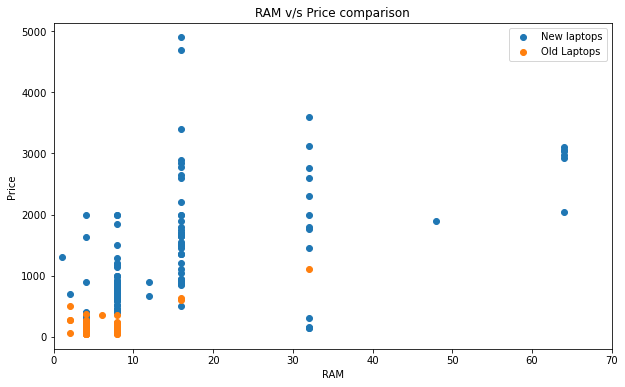

In [65]:
#Visualizations

import matplotlib.pyplot as plt   #python module for data visualization

plt.figure(figsize = (10,6))
plt.scatter(new_laptops_df["RAM"],new_laptops_df["Prices"])
plt.scatter(old_laptops_df["RAM"],old_laptops_df["Prices"])
plt.xlabel("RAM")
plt.ylabel("Price")
plt.title("RAM v/s Price comparison")
plt.legend(["New laptops","Old Laptops"])
plt.xlim(0,70)   #Dropping outlier 512
plt.show()

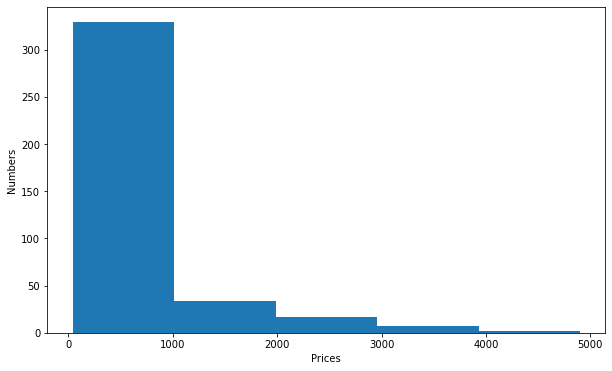

In [108]:
plt.figure(figsize = (10,6))
plt.hist(filtered_laptops_df["Prices"], bins = 5)
plt.xlabel("Prices")
plt.ylabel("Numbers")
plt.show()

#Most of the laptops have a price cap of max 1000$

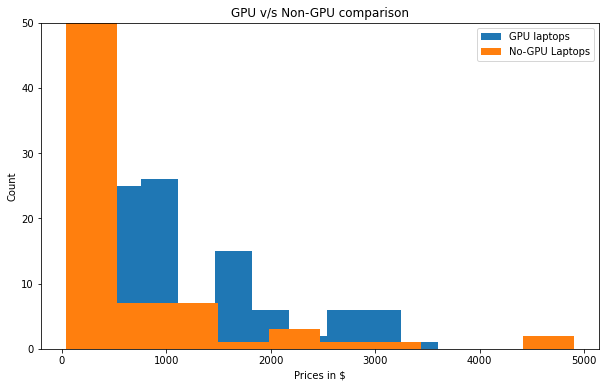

In [128]:
#Comparison of prices of GPU vs Non-GPU laptops

plt.figure(figsize = (10,6))
plt.hist(gpu_laptops["Prices"])
plt.hist(no_gpu_laptops["Prices"])
plt.ylim(0,50)
plt.xlabel("Prices in $")
plt.ylabel("Count")
plt.title("GPU v/s Non-GPU comparison")
plt.legend(["GPU laptops","No-GPU Laptops"])
plt.show()

#Laptops having GPU have mostly higher prices than thier counterparts!

In [135]:
#Analysis of expensive laptops (above 1000$)

expensive_laptops = filtered_laptops_df[filtered_laptops_df.Prices >= 1000]
expensive_laptops

,index,Name,Condition,RAM,GPU,SSD,Prices
2,1,HP ZBook Firefly 14 G7 Core i7-10610U Quadro P...,New,16,1,512,1799.00
6,5,"New Lenovo ThinkPad P15s Gen 2,i7-1165G7,FH",New,48,1,1000,1899.00
7,6,"New ThinkPad X1 Extreme Gen3,15.6"" 4K OLED,i9-...",New,16,1,-1,2849.00
13,12,FZ-55A0601VM Rugged Toughbook FZ-55 Authorize...,New,8,0,-1,1999.00
14,13,"Brand New! 14"" HP Elitebook 840 G8, 2.60Ghz i5...",New,16,1,256,1349.95
16,15,4TB/mk6/core i5/7300/cf-31/,New,16,0,2000,4899.99
19,18,NEW/Toughbook CF-53 MK4/CF-532ALRY,New,16,0,1,2899.99
21,20,"New HP EliteBook 840 G6 14"" FHD Laptop Compute...",New,8,1,256,1279.99
25,24,Lenovo ThinkPad X1 Carbon 20HR - Ultrabook - C...,New,16,0,512,1899.99
27,26,"New ThinkPad X1 Extreme Gen 3,15.6"" 4K OLED To...",New,64,1,1000,2919.00


In [153]:
#Pearson Correlation Coefficent Calculation

from scipy import stats
stats.pearsonr(filtered_laptops_df["SSD"],filtered_laptops_df["Prices"])

#Results indicates high correlation between "SSD" and "Prices" suggesting if one increases, then other as well!

(0.6798230030137118, 4.524805367405428e-54)

In [175]:
#Data Preprocessing ahead of Predictions
#Changing conditions column to suitable values

new_condition = filtered_laptops_df["Condition"].astype("category").cat.codes
filtered_laptops_df["New_Condition"] = new_condition
filtered_laptops_df

,index,Name,Condition,RAM,GPU,SSD,Prices,New_Condition
1,0,NEW HP 14 LAPTOP FHD IPS 4GB RAM 256 GB SSD In...,New,4,1,256,394.95,0
2,1,HP ZBook Firefly 14 G7 Core i7-10610U Quadro P...,New,16,1,512,1799.00,0
3,2,"Lenovo 500e 2-in-1 Chromebook 2nd Gen 11.6"" IP...",New,4,1,-1,340.95,0
4,3,*NEW* HP ProBook 645 G3 14″ Notebook A10-8730 ...,New,8,0,256,799.00,0
6,5,"New Lenovo ThinkPad P15s Gen 2,i7-1165G7,FH",New,48,1,1000,1899.00,0
...,...,...,...,...,...,...,...,...
510,509,"Dell Latitude E6330 13.3"" Laptop 2.30 Ghz i3-2...",Used,4,0,-1,103.70,1
511,510,"Dell Latitude 3340 13.3"" Laptop 1.7 GHz i3-400...",Used,4,0,-1,102.00,1
512,511,"HP EliteBook 840 G3 14"" Laptop 3.1GHz i7-6500U...",Used,4,0,-1,226.95,1
513,512,"Lenovo ThinkPad T460s 14"" Laptop 2.4 GHz i5 6t...",Used,4,0,-1,189.55,1


In [176]:
#Machine Learning and Price Prediction

#Let's get the features
X = filtered_laptops_df[["New_Condition","RAM","GPU","SSD","Prices"]]

#Let's get the target
y = filtered_laptops_df.Prices

from sklearn.model_selection import train_test_split   #To split the data for training and testing purposes

train_x, val_x, train_y, val_y = train_test_split(X,y)   #Splitting the data

In [177]:
#Steps to Follow:
#1) Define the Model
#2) Capture Patterns from provided Data
#3) Predict
#4) Evaluate

from sklearn.tree import DecisionTreeRegressor   #Model Specified -> Decision Tree

model = DecisionTreeRegressor()

model.fit(train_x,train_y)   #Fitting the model using training data

DecisionTreeRegressor()

In [187]:
#Predicting:-

price_predictions = model.predict(val_x)

In [191]:
predictions_df = val_x
predictions_df["Predicted_Prices"] = price_predictions
predictions_df
#Here's the exact Dataset

,New_Condition,RAM,GPU,SSD,Prices,Predicted_Prices
317,1,2,0,-1,51.00,51.00
475,1,4,0,-1,104.55,103.70
419,1,4,0,-1,62.05,62.05
428,1,4,0,-1,117.30,118.15
442,1,4,0,-1,95.20,96.05
...,...,...,...,...,...,...
332,1,4,0,-1,90.10,90.10
366,1,4,0,-1,96.05,96.05
20,0,8,1,256,675.00,679.49
503,1,4,0,-1,89.25,88.40


In [197]:
#Validating the model:- Using Mean Absolute Error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(val_y,price_predictions)

print("The Mean Absolute error is : ", mae)

The Mean Absolute error is :  6.2623469387755115


In [195]:
predictions_df["Actual_Prices"] = val_y

In [196]:
#The whole Dataset after predictions is as follows:

predictions_df

#Our MAE is very low indicating great prediction results

,New_Condition,RAM,GPU,SSD,Prices,Predicted_Prices,Actual_Prices
317,1,2,0,-1,51.00,51.00,51.00
475,1,4,0,-1,104.55,103.70,104.55
419,1,4,0,-1,62.05,62.05,62.05
428,1,4,0,-1,117.30,118.15,117.30
442,1,4,0,-1,95.20,96.05,95.20
...,...,...,...,...,...,...,...
332,1,4,0,-1,90.10,90.10,90.10
366,1,4,0,-1,96.05,96.05,96.05
20,0,8,1,256,675.00,679.49,675.00
503,1,4,0,-1,89.25,88.40,89.25


### --------------------------------------------------------------------------------------------------------------------------------------------------------------